
¡Hola, Hans!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>



# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [78]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
# Carga los archivos de datos en diferentes DataFrames



## Preparar los datos

In [79]:
calls.info()
internet.info()
messages.info()
plans.info()
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

En este primer paso imprimimos la informacion de cada DataFrame para ver a detalle la informacion general, es decir el tipo de datos, los valores nulos o duplicados a demas de verificar que los titulos esten escritos correctamente.

## Tarifas

In [80]:
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [81]:
# Imprime una muestra de los datos para las tarifas
print(plans.info())
print(plans.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10      


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] 

En este primer data podemos ver algunos tipos de datos no son correctos como el de los dineros 


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Dado que no son muchos datos solo puedo ver el cambio de datos de int a float en usd_monthly_pay y usd_per_gb     

In [82]:
plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype(float)
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)
print(plans.dtypes)

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay          float64
usd_per_gb               float64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] 

Ya que este df es solo informativo no voy enriquecer nada por si mas a delante tenemos que hacer cambios 

## Usuarios/as

In [83]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [84]:
# Imprime una muestra de datos para usuarios
usuarios_aleatorios = users.sample(10)
print(usuarios_aleatorios)


     user_id   first_name last_name  age  \
17      1017        Boris     Gates   61   
9       1009        Gerry    Little   19   
116     1116       Moriah     Yates   60   
142     1142  Charlesetta   Dillard   18   
84      1084        Wiley  Mckinney   21   
138     1138        Arlie   Higgins   66   
469     1469         Rory     Nixon   75   
495     1495        Fidel    Sharpe   67   
67      1067         Robt     Allen   37   
140     1140     Randolph    Graves   53   

                                                 city    reg_date  plan  \
17   Washington-Arlington-Alexandria, DC-VA-MD-WV MSA  2018-08-26  surf   
9              San Jose-Sunnyvale-Santa Clara, CA MSA  2018-04-22  surf   
116                          Cincinnati, OH-KY-IN MSA  2018-08-08  surf   
142                      New Orleans-Metairie, LA MSA  2018-08-23  surf   
84      Miami-Fort Lauderdale-West Palm Beach, FL MSA  2018-06-04  surf   
138          Riverside-San Bernardino-Ontario, CA MSA  2018-02-06

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Imprimi 10 datos aleatorios para visualizar de mejor forma la informacion, punto a corregir es el formato de la fecha de object a datatime y el valor ausente de churn_date, como hemos visto desde el inicio los valores ausentes ahi no son importantes por que siguen siendo clientes lo que nos brinda informacion son los que tienen valor, ya que podemos decir que terminaron el servicio con Megaline 


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.] 

Podemos visualizar que las columnas 'reg_date' y 'churn_date' tienen formato object, procederemos a cambiarlas a formato datetime.

In [85]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]


Aqui eliminamos las siglas (MSA) YA QUE NO APORTAN VALOR A LOS DATOS.

In [86]:
users['city'] = users['city'].str.replace('MSA', '').str.strip()

users.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
235,1235,Felton,Nguyen,50,"Minneapolis-St. Paul-Bloomington, MN-WI",2018-02-20,surf,NaT
279,1279,Neal,Duke,27,"Baton Rouge, LA",2018-02-05,ultimate,NaT
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN",2018-08-21,surf,NaT
291,1291,Angeles,Mejia,65,"Indianapolis-Carmel-Anderson, IN",2018-01-29,surf,NaT
412,1412,Cortez,Reese,61,"Detroit-Warren-Dearborn, MI",2018-04-08,ultimate,NaT


## Llamadas

In [87]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [88]:
# Imprime una muestra de datos para las llamadas

calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?] 

El punto a corregir 'call_date' tiene formato objetc, procederemos cambiarla a formato datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [89]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles]

Para estudiar mejor este df, vamos a anexarle las columnas 'month', 'year' y 'year_month'. Todos estos datos provienen de la columna 'call_date' y eliminaremos todas las entradas en la columna 'duration' que tengan un valor 0.0, con el fin de que los datos esten limpios.

In [90]:
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year                    
calls['year_month'] = calls['year'].astype('str') + '_' + calls['month'].astype('str')

calls.head()

,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,8.52,12,2018,2018_12
1,1000_145,1000,2018-12-27,13.66,12,2018,2018_12
2,1000_247,1000,2018-12-27,14.48,12,2018,2018_12
3,1000_309,1000,2018-12-28,5.76,12,2018,2018_12
4,1000_380,1000,2018-12-30,4.22,12,2018,2018_12


In [91]:
calls[calls['duration'] == 0.0]

,id,user_id,call_date,duration,month,year,year_month
19,1001_4,1001,2018-12-05,0.0,12,2018,2018_12
25,1001_13,1001,2018-12-24,0.0,12,2018,2018_12
31,1001_30,1001,2018-10-17,0.0,10,2018,2018_10
32,1001_31,1001,2018-11-03,0.0,11,2018,2018_11
34,1001_35,1001,2018-12-21,0.0,12,2018,2018_12
...,...,...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,11,2018,2018_11
137715,1499_184,1499,2018-09-15,0.0,9,2018,2018_9
137720,1499_189,1499,2018-12-27,0.0,12,2018,2018_12
137722,1499_191,1499,2018-12-24,0.0,12,2018,2018_12


In [92]:
calls = calls.query('duration != 0.0')

calls[calls['duration'] == 0.0]

,id,user_id,call_date,duration,month,year,year_month


In [93]:
calls['duration'] = np.ceil(calls['duration']).astype(int)

calls.head()


,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,9,12,2018,2018_12
1,1000_145,1000,2018-12-27,14,12,2018,2018_12
2,1000_247,1000,2018-12-27,15,12,2018,2018_12
3,1000_309,1000,2018-12-28,6,12,2018,2018_12
4,1000_380,1000,2018-12-30,5,12,2018,2018_12


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

In [94]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          110901 non-null  object        
 1   user_id     110901 non-null  int64         
 2   call_date   110901 non-null  datetime64[ns]
 3   duration    110901 non-null  int64         
 4   month       110901 non-null  int64         
 5   year        110901 non-null  int64         
 6   year_month  110901 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 6.8+ MB


## Mensajes

In [95]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [96]:
# Imprime una muestra de datos para los mensajes
print(messages.head())
messages_aleatorios = messages.sample(10)
print(messages_aleatorios)

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
             id  user_id message_date
51201  1331_376     1331   2018-09-10
71601  1466_253     1466   2018-12-12
66200  1433_140     1433   2018-12-22
47379   1324_92     1324   2018-12-25
69114  1448_142     1448   2018-11-05
52357  1336_332     1336   2018-12-09
37452   1248_16     1248   2018-12-31
61851  1385_315     1385   2018-06-11
56793  1361_145     1361   2018-09-10
63281  1401_295     1401   2018-08-25


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
la informacion de los mensajes es corta y solo veo la corraccion del formato de la fecha 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [97]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Aqui vamos a juntar las columnas 'month', 'year' y 'year_month' con los datos de la columna 'message_date' para hacer un mejor estudio.

In [98]:
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year                    
messages['year_month'] = messages['year'].astype('str') + '_' + messages['month'].astype('str')
messages.head()

,id,user_id,message_date,month,year,year_month
0,1000_125,1000,2018-12-27,12,2018,2018_12
1,1000_160,1000,2018-12-31,12,2018,2018_12
2,1000_223,1000,2018-12-31,12,2018,2018_12
3,1000_251,1000,2018-12-27,12,2018,2018_12
4,1000_255,1000,2018-12-26,12,2018,2018_12


## Internet

In [99]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [100]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())
internet_aleatorio = internet.sample(10)
print(internet_aleatorio)


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
             id  user_id session_date  mb_used
56950  1257_217     1257   2018-12-19   177.75
79252  1368_454     1368   2018-09-07   530.13
21192  1098_233     1098   2018-10-26   458.67
54172   1246_73     1246   2018-05-16     0.00
5460    1030_59     1030   2018-12-05   105.04
63220  1291_345     1291   2018-05-04   499.01
81186  1380_157     1380   2018-10-10   618.64
87465  1405_247     1405   2018-07-17   117.10
45091   1200_21     1200   2018-11-29   772.37
6001    1033_62     1033   2018-12-13   200.06


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aqui solo vamos a correguir el formato de la fecha.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Correccion del formato de la fecha.

In [101]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.] 

Aqui vamos a juntar las columnas 'month', 'year' y 'year_month' con los datos de la columna 'session_date' para hacer un mejor estudio.

In [102]:
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year                    
internet['year_month'] = internet['year'].astype('str') + '_' + internet['month'].astype('str')
internet.head()

,id,user_id,session_date,mb_used,month,year,year_month
0,1000_13,1000,2018-12-29,89.86,12,2018,2018_12
1,1000_204,1000,2018-12-31,0.00,12,2018,2018_12
2,1000_379,1000,2018-12-28,660.40,12,2018,2018_12
3,1000_413,1000,2018-12-26,270.99,12,2018,2018_12
4,1000_442,1000,2018-12-27,880.22,12,2018,2018_12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [103]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

Procederemos a realizar cuatro tablas pivote para mostrar información mensual de los usuarios sobre; numero de llamadas, cantidad de minutos, cantidad de mensajes enviados y volumen de mb.

In [104]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_user_month = calls.pivot_table(index = ['user_id', 'month'],
                                     values = 'duration', 
                                     aggfunc = 'count')

calls_user_month = calls_user_month.reset_index()

calls_user_month.columns = ['user_id', 'month', 'num_call']

calls_user_month

,user_id,month,num_call
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! la función de pivot_table() es muy recomendable para hacer los códigos más eficientes.
    
</div>

In [105]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_user_month = calls.pivot_table(index = ['user_id', 'month'],
                                 values = 'duration',
                                 aggfunc = 'sum')

minutes_user_month = minutes_user_month.reset_index()

minutes_user_month.columns = ['user_id', 'month', 'minutes_call']

minutes_user_month

,user_id,month,minutes_call
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2251,1498,12,339
2252,1499,9,346
2253,1499,10,385
2254,1499,11,308


In [106]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_user_month = messages.pivot_table(index = ['user_id', 'month'], 
                                  values = 'message_date', 
                                  aggfunc= 'count')

messages_user_month = messages_user_month.reset_index()

messages_user_month.columns = ['user_id', 'month', 'num_message']

messages_user_month

,user_id,month,num_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [107]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_volume_user_month = internet.pivot_table(index = ['user_id', 'month'], 
                                  values = 'mb_used', 
                                  aggfunc= 'sum')

internet_volume_user_month = internet_volume_user_month.reset_index()

internet_volume_user_month.columns = ['user_id', 'month', 'gb_used']

internet_volume_user_month

,user_id,month,gb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [108]:
#aqui vamos a convertir los mb a gb.

In [109]:
internet_volume_user_month['gb_used'] = np.ceil(internet_volume_user_month['gb_used']/1024)
internet_volume_user_month

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [110]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month


In [111]:
df = calls_user_month.merge(minutes_user_month, on = ['user_id', 'month'], how = 'outer')

df = df.merge(messages_user_month, on = ['user_id', 'month'], how = 'outer')

df = df.merge(internet_volume_user_month, on = ['user_id', 'month'], how = 'outer') 

df

,user_id,month,num_call,minutes_call,num_message,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,22.0,182.0,30.0,7.0
2,1001,9,38.0,315.0,44.0,14.0
3,1001,10,47.0,393.0,53.0,22.0
4,1001,11,49.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,1.0
2289,1482,10,NaN,NaN,2.0,NaN
2290,1094,10,NaN,NaN,NaN,2.0
2291,1108,12,NaN,NaN,NaN,1.0


In [112]:
# Añade la información de la tarifa


In [113]:
df = df.merge(users, on = 'user_id', how = 'left')

df

,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT
1,1001,8,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT
2,1001,9,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT
3,1001,10,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT
4,1001,11,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,1.0,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA",2018-11-29,ultimate,NaT
2289,1482,10,NaN,NaN,2.0,NaN,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA",2018-01-01,ultimate,NaT
2290,1094,10,NaN,NaN,NaN,2.0,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA",2018-10-30,surf,2018-12-12
2291,1108,12,NaN,NaN,NaN,1.0,Porfirio,Kane,45,"Salt Lake City, UT",2018-12-30,ultimate,NaT


In [114]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2293 non-null   int64         
 1   month         2293 non-null   int64         
 2   num_call      2256 non-null   float64       
 3   minutes_call  2256 non-null   float64       
 4   num_message   1806 non-null   float64       
 5   gb_used       2277 non-null   float64       
 6   first_name    2293 non-null   object        
 7   last_name     2293 non-null   object        
 8   age           2293 non-null   int64         
 9   city          2293 non-null   object        
 10  reg_date      2293 non-null   datetime64[ns]
 11  plan          2293 non-null   object        
 12  churn_date    158 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 250.8+ KB


In [118]:
#Aqui podemos ver que hay columnas con valores ausentes, procederemos a solucionarlo

In [119]:
for i in ('num_call', 'minutes_call', 'num_message', 'gb_used'):
    df[i] = df[i].fillna(0)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2293 non-null   int64         
 1   month         2293 non-null   int64         
 2   num_call      2293 non-null   float64       
 3   minutes_call  2293 non-null   float64       
 4   num_message   2293 non-null   float64       
 5   gb_used       2293 non-null   float64       
 6   first_name    2293 non-null   object        
 7   last_name     2293 non-null   object        
 8   age           2293 non-null   int64         
 9   city          2293 non-null   object        
 10  reg_date      2293 non-null   datetime64[ns]
 11  plan          2293 non-null   object        
 12  churn_date    158 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(4)
memory usage: 250.8+ KB


In [120]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [121]:
# Calcula el ingreso mensual para cada usuario
def income(row):
    messages = row['num_message']
    duration = row['minutes_call']
    gb = row['gb_used']
    plan = row['plan']
    
    package_limit = 0
    message_limit = 0
    internet_limit = 0
    calls_limit = 0

    if plan == 'surf':
        pack_cost = 20
        if duration > 500:
            calls_limit = (duration - 500) * 0.3
        if messages > 50:
            message_limit = (messages - 50) * 0.3
        if gb > 15:
            internet_limit = (gb -15) * 10
    
    elif plan == 'ultimate':
        pack_cost = 70
        if duration > 3000:
            calls_limit = (duration - 3000) * 0.1
        if messages > 1000:
            message_limit = (messages - 1000) * 0.1
        if gb > 30:
            internet_limit = (gb - 30) * 0.1
            
    total = pack_cost + calls_limit + message_limit + internet_limit

    return total


In [124]:
#Aqui vamos a imprimir el nuevo df 'income' donde aplicamos los cambios.

In [125]:

df['income'] = df.apply(income, axis = 1)

df.head()

,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,income
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT,70.0
1,1001,8,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,20.0
2,1001,9,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,20.0
3,1001,10,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,90.9
4,1001,11,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,60.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el calculo del ingreso mensual por usuario. Además, anteriormente redondeas de manera correcta la duración de las llamadas y los gb

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

In [126]:
# Creamos dos nuevos Df filtrados por el tipo de plan.

In [127]:
df_surf = df.query('plan == "surf"')
df_ultimate = df.query('plan == "ultimate"')

df_surf.info()

df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 1 to 2290
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       1573 non-null   int64         
 1   month         1573 non-null   int64         
 2   num_call      1573 non-null   float64       
 3   minutes_call  1573 non-null   float64       
 4   num_message   1573 non-null   float64       
 5   gb_used       1573 non-null   float64       
 6   first_name    1573 non-null   object        
 7   last_name     1573 non-null   object        
 8   age           1573 non-null   int64         
 9   city          1573 non-null   object        
 10  reg_date      1573 non-null   datetime64[ns]
 11  plan          1573 non-null   object        
 12  churn_date    106 non-null    datetime64[ns]
 13  income        1573 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 184.3+ KB
<class 'pa

### Llamadas

In [128]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



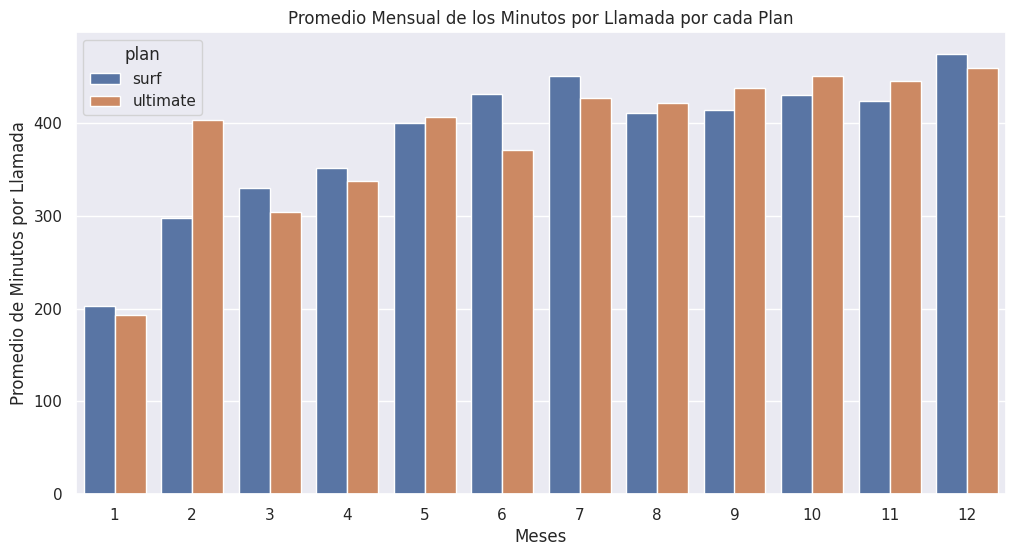

In [129]:
table_call_duration = df.pivot_table(index = ['plan', 'month'], values='minutes_call', aggfunc='mean').reset_index()

table_call_duration
sns.set()

def barplot (a, b, c, d):
    plt.figure(figsize=(12,6))
    sns.barplot(x='month', y=b, hue='plan', data=a)
    plt.xlabel('Meses')
    plt.ylabel(c)
    plt.title(d)
    plt.show()
barplot(table_call_duration, 'minutes_call', 'Promedio de Minutos por Llamada', 'Promedio Mensual de los Minutos por Llamada por cada Plan')

In [130]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.



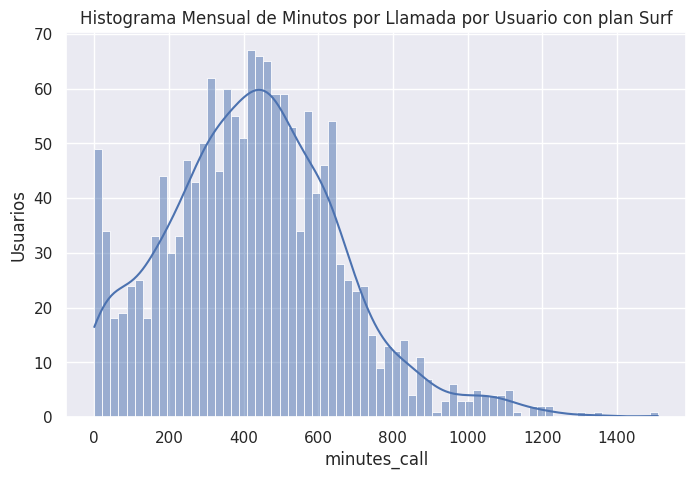

In [131]:
def hisplot (a, b, c):
    plt.figure(figsize = (8,5))
    sns.histplot(a[b], bins = 70, kde = True)
    plt.xlabel(b)
    plt.ylabel('Usuarios')
    plt.title(c)
    plt.show()
hisplot(df_surf, 'minutes_call', 'Histograma Mensual de Minutos por Llamada por Usuario con plan Surf')

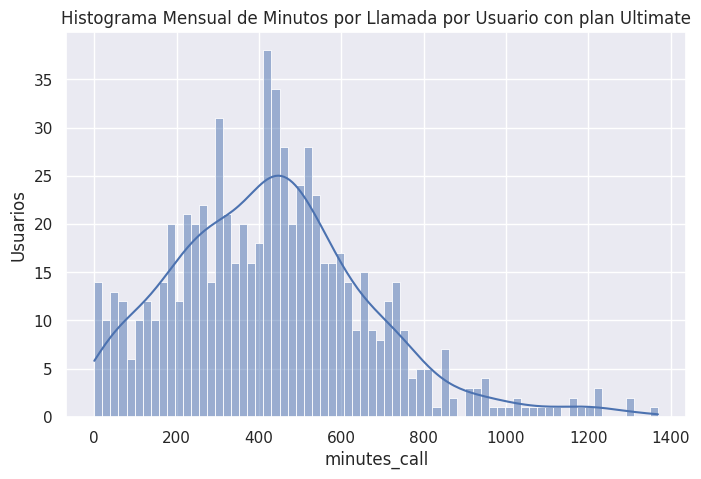

In [132]:
hisplot(df_ultimate, 'minutes_call', 'Histograma Mensual de Minutos por Llamada por Usuario con plan Ultimate')

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [133]:
# Calcula la media y la varianza de la duración mensual de llamadas.

promedio_mensual_call_duration_surf = df_surf['minutes_call'].mean()
print('Promedio de la Duración de las Llamadas del Plan Surf:', round(promedio_mensual_call_duration_surf,2))

var_mensual_call_duration_surf = np.var(df_surf['minutes_call'])
print('Varianza de la Duración de las Llamadas del Plan Surf:', round(var_mensual_call_duration_surf,2))

std_mensual_call_duration_surf = np.sqrt(var_mensual_call_duration_surf)
print('Desviación Estándar de la Duración de las Llamadas del Plan Surf:', round(std_mensual_call_duration_surf,2))

Promedio de la Duración de las Llamadas del Plan Surf: 428.75
Varianza de la Duración de las Llamadas del Plan Surf: 54933.33
Desviación Estándar de la Duración de las Llamadas del Plan Surf: 234.38


In [134]:
promedio_mensual_call_duration_ultimate = df_ultimate['minutes_call'].mean()
print('Promedio de la Duración de las Llamadas del Plan Ultimate:', round(promedio_mensual_call_duration_ultimate,2))

var_mensual_call_duration_ultimate = np.var(df_ultimate['minutes_call'])
print('Varianza de la Duración de las Llamadas del Plan Ultimate:', round(var_mensual_call_duration_ultimate,2))

std_mensual_call_duration_ultimate = np.sqrt(var_mensual_call_duration_ultimate)
print('Desviación Estándar de la Duración de las Llamadas del Plan Ultimate:', round(std_mensual_call_duration_ultimate,2))

Promedio de la Duración de las Llamadas del Plan Ultimate: 430.45
Varianza de la Duración de las Llamadas del Plan Ultimate: 57764.13
Desviación Estándar de la Duración de las Llamadas del Plan Ultimate: 240.34


<AxesSubplot:title={'center':'minutes_call'}, xlabel='month'>

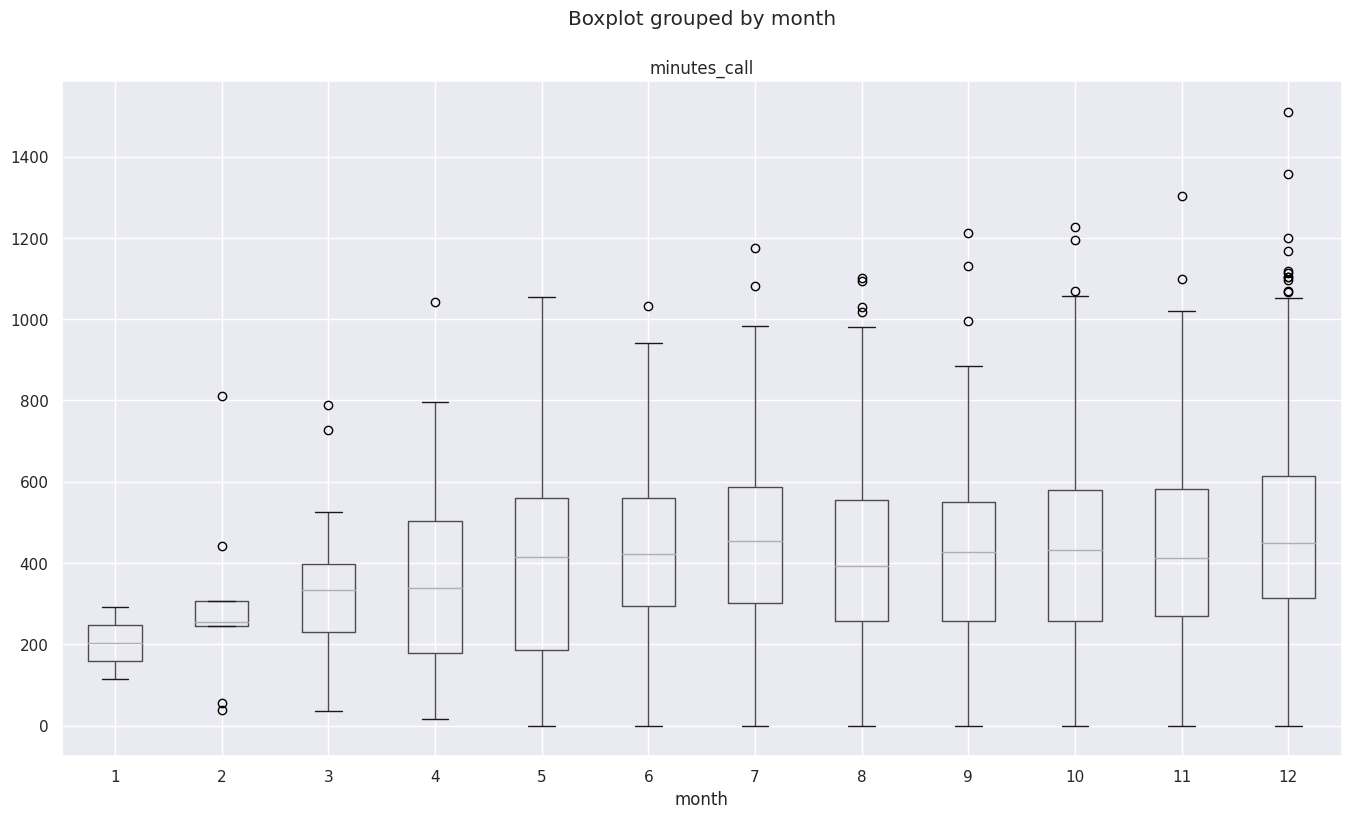

In [135]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

df_surf.boxplot(by= 'month', column= 'minutes_call', figsize= (16, 9))

<AxesSubplot:title={'center':'minutes_call'}, xlabel='month'>

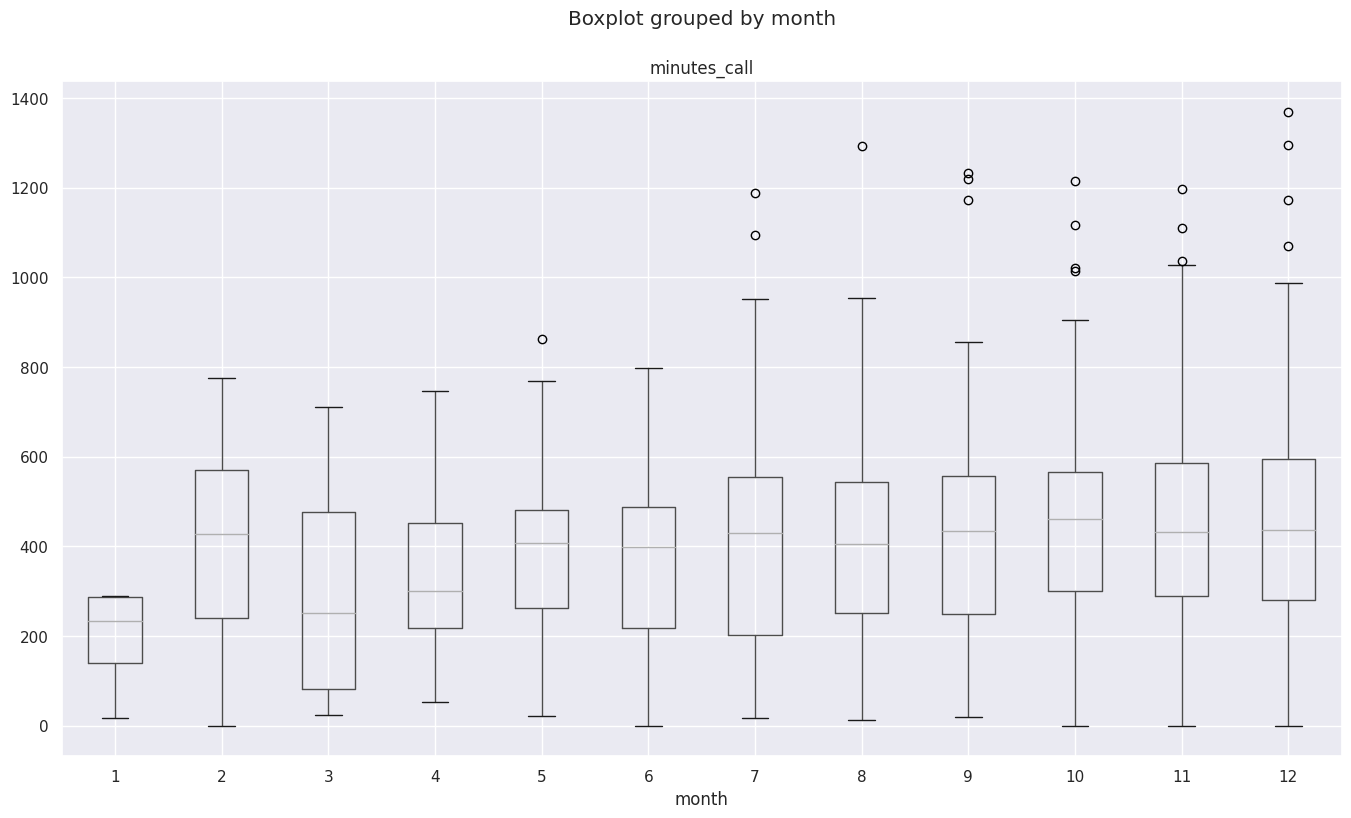

In [136]:
df_ultimate.boxplot(by= 'month', column= 'minutes_call', figsize= (16, 9))

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan

Hay valores atípicos en los dos planes cuando los usuarios usaron más de 1.000 minutos llamando.
En ambos planes, la mayoría de los usuarios gastaron entre 200 y 600 minutos al mes.

### Mensajes

In [137]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

table_message_sent = df.pivot_table(index=['plan', 'month'], values='num_message', aggfunc='median').reset_index()

table_message_sent

,plan,month,num_message
0,surf,1,10.5
1,surf,2,3.0
2,surf,3,7.0
3,surf,4,10.0
4,surf,5,15.0
5,surf,6,15.0
6,surf,7,20.0
7,surf,8,20.0
8,surf,9,22.5
9,surf,10,26.0


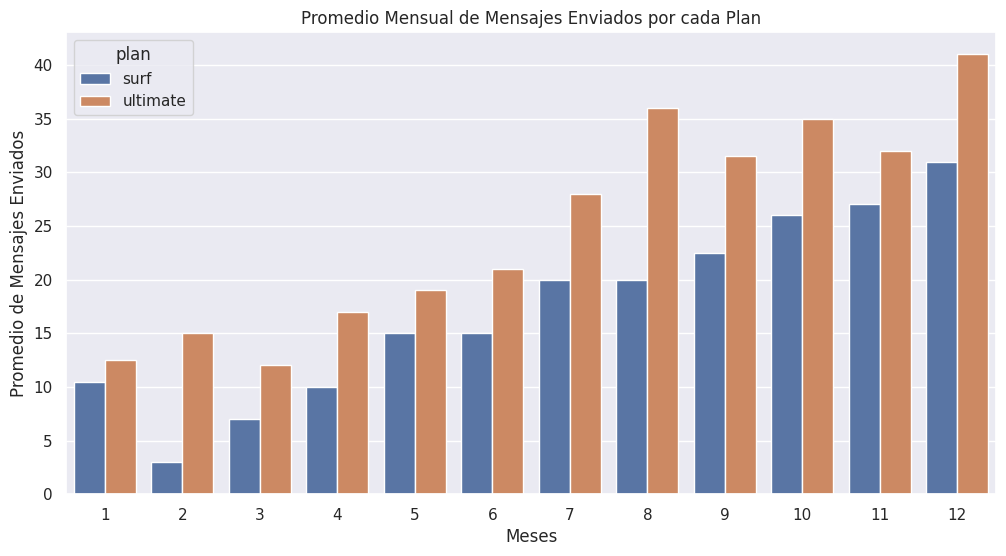

In [138]:
#Grafica de barras del comportamiento de usuarios de cada plan 
barplot(table_message_sent, 'num_message', 'Promedio de Mensajes Enviados', 'Promedio Mensual de Mensajes Enviados por cada Plan')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Los usuarios del plan Ultimate mandan mas mensajes que los usuarios del plan surf y en ambos es comportamiento es ascendente mes con mes.

### Internet

In [139]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan 
table_data_used = df.pivot_table(index=['plan', 'month'], values='gb_used', aggfunc='median').reset_index()
table_data_used

,plan,month,gb_used
0,surf,1,5.0
1,surf,2,12.0
2,surf,3,14.0
3,surf,4,12.0
4,surf,5,14.0
5,surf,6,16.0
6,surf,7,17.0
7,surf,8,17.0
8,surf,9,17.0
9,surf,10,18.0


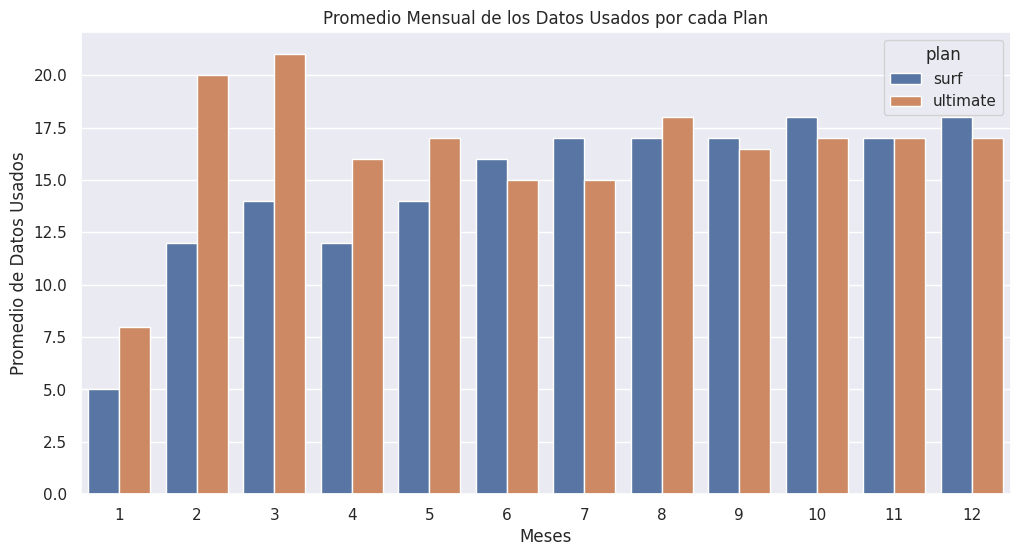

In [140]:
#Grafico de barras 
barplot(table_data_used, 'gb_used', 'Promedio de Datos Usados', 'Promedio Mensual de los Datos Usados por cada Plan')

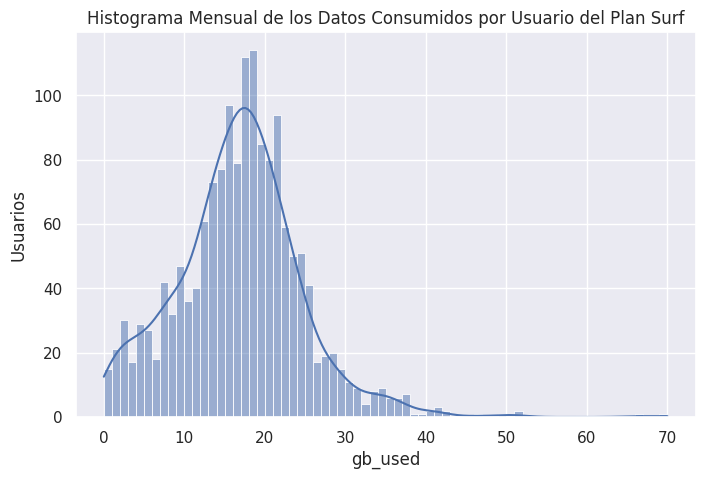

In [141]:
hisplot(df_surf, 'gb_used', 'Histograma Mensual de los Datos Consumidos por Usuario del Plan Surf')

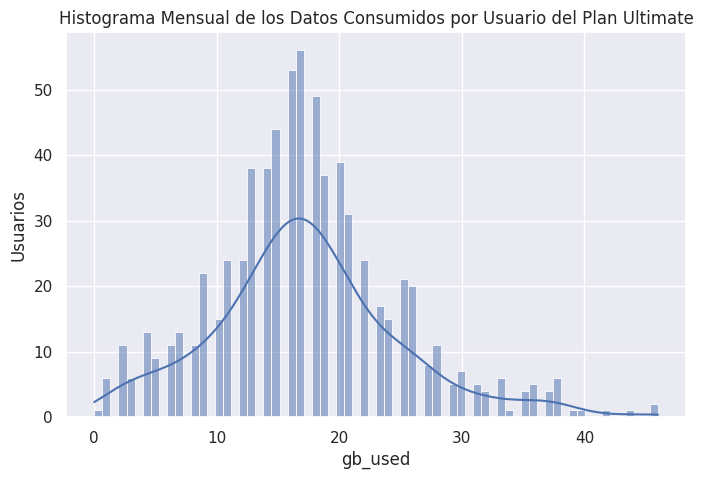

In [142]:
hisplot(df_ultimate, 'gb_used', 'Histograma Mensual de los Datos Consumidos por Usuario del Plan Ultimate')

In [143]:
avg_monthly_data_used_surf = df_surf['gb_used'].mean()
print('Promedio de los Datos Usados por el Plan Surf:', round(avg_monthly_data_used_surf,2))

var_monthly_data_used_surf = np.var(df_surf['gb_used'])
print('Varianza de los Datos Usados por el Plan Surf:', round(var_monthly_data_used_surf,2))

std_monthly_data_used_surf = np.sqrt(var_monthly_data_used_surf)
print('Desviación Estándar de los Datos Usados por el Plan Surf:', round(std_monthly_data_used_surf,2))

Promedio de los Datos Usados por el Plan Surf: 16.67
Varianza de los Datos Usados por el Plan Surf: 61.54
Desviación Estándar de los Datos Usados por el Plan Surf: 7.85


In [144]:
avg_monthly_data_used_ultimate = df_ultimate['gb_used'].mean()
print('Promedio de los Datos Usados por el Plan Ultimate:', round(avg_monthly_data_used_ultimate,2))

var_monthly_data_used_ultimate = np.var(df_ultimate['gb_used'])
print('Varianza de los Datos Usados por el Plan Ultimate:', round(var_monthly_data_used_ultimate,2))

std_monthly_data_used_ultimate = np.sqrt(var_monthly_data_used_ultimate)
print('Desviación Estándar de los Datos Usados por el Plan Ultimate:', round(std_monthly_data_used_ultimate,2))

Promedio de los Datos Usados por el Plan Ultimate: 17.31
Varianza de los Datos Usados por el Plan Ultimate: 58.75
Desviación Estándar de los Datos Usados por el Plan Ultimate: 7.66


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

La mayoría de los usuarios usan entre 10 gb y 20 gb al mes y aunque el promedi de consumo nos dice que los usuarios de Ultimate consumen mas datos, la desviacion estandar es mayor en los usuarios Surf.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [145]:
table_income = df.pivot_table(index=['plan', 'month'], values='income', aggfunc='mean').reset_index()
table_income

,plan,month,income
0,surf,1,20.000000
1,surf,2,43.966667
2,surf,3,52.456522
3,surf,4,50.706000
4,surf,5,63.684416
5,surf,6,65.030928
6,surf,7,83.765289
7,surf,8,80.422840
8,surf,9,72.869588
9,surf,10,83.832489


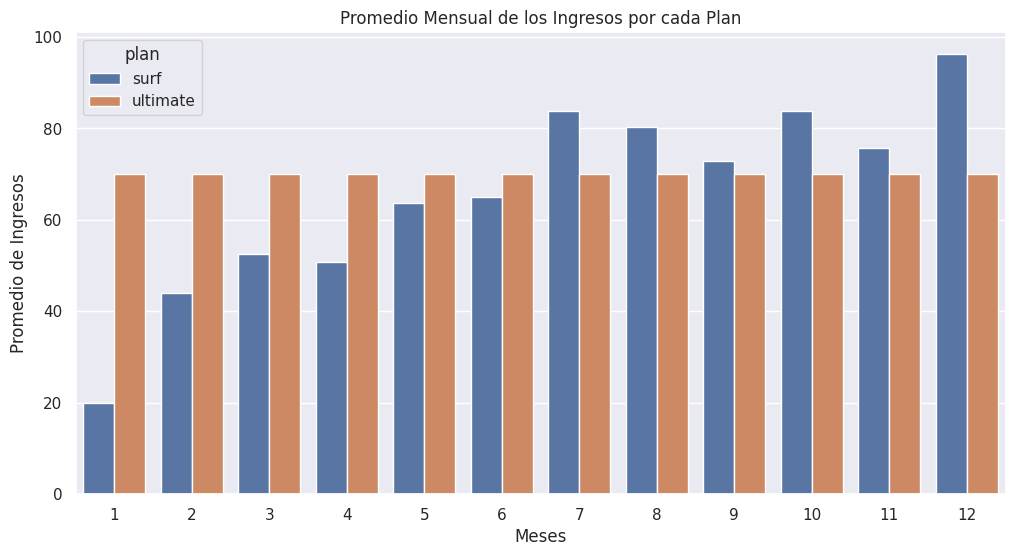

In [146]:
barplot(table_income, 'income', 'Promedio de Ingresos', 'Promedio Mensual de los Ingresos por cada Plan')

In [147]:
avg_monthly_revenue_surf = df_surf['income'].mean()
print('Promedio del Ingreso Mensual del Plan Surf:', round(avg_monthly_revenue_surf,2))

var_monthly_revenue_surf = np.var(df_surf['income'])
print('Varianza del Ingreso Mensual del Plan Surf:', round(var_monthly_revenue_surf,2))

std_monthly_revenue_surf = np.sqrt(var_monthly_revenue_surf)
print('Desviación Estándar del Ingreso Mensual del Plan Surf:', round(std_monthly_revenue_surf,2))

Promedio del Ingreso Mensual del Plan Surf: 79.19
Varianza del Ingreso Mensual del Plan Surf: 5393.39
Desviación Estándar del Ingreso Mensual del Plan Surf: 73.44


In [148]:
avg_monthly_revenue_ultimate = df_ultimate['income'].mean()
print('Promedio del Ingreso Mensual del Plan Ultimate:', round(avg_monthly_revenue_ultimate,2))

var_monthly_revenue_ultimate = np.var(df_ultimate['income'])
print('Varianza del Ingreso Mensual del Plan Ultimate:', round(var_monthly_revenue_ultimate,2))

std_monthly_revenue_ultimate = np.sqrt(var_monthly_revenue_ultimate)
print('Desviación Estándar del Ingreso Mensual del Plan Ultimate:', round(std_monthly_revenue_ultimate,2))

Promedio del Ingreso Mensual del Plan Ultimate: 70.03
Varianza del Ingreso Mensual del Plan Ultimate: 0.03
Desviación Estándar del Ingreso Mensual del Plan Ultimate: 0.16


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Los usuarios que consumen el plan Ultimate son muy estables y aunque los usuarios que consumen Surf representan menos dinero ingresado van en incremento despues del primer semestre.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipotesis nula(H0): el ingreso promedio mensual del plan surf NO es igual al del ultimate

Hipotesis alterna(H1): el ingreso promedio mensual del plan surf es igual al del ultimate
Valor alpha = 0.05

In [149]:
#Primero vamos a determinar si equal_var = True o equal_var = False, usaremos la Prueba de Levene. Esta nos dice que si el p-value es superior a 0.05, entonces se puede asumir que ambas muestras tienen igual varianza.
plan_levene =  st.levene(df_surf['income'], df_ultimate['income'])

plan_levene

LeveneResult(statistic=563.0175149428126, pvalue=1.8061156986411457e-111)

In [150]:
# Prueba las hipótesis
alpha = 0.05

results = st.ttest_ind(df_surf['income'], df_ultimate['income'], equal_var = True)
print('p-value:', round(results.pvalue, 5))

if results.pvalue < alpha:
    print('Rechazamos la Hipótesis Nula')
else:
    print("No rechazamos la Hipótesis Nula")


p-value: 0.00083
Rechazamos la Hipótesis Nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]


In [151]:
#Filtramos por las ciudades  NY y NJ
df_ny_nj = df[df['city'].str.contains('NY-NJ')].reset_index(drop = True)
df_ny_nj.head()

,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,income
0,1014,11,23.0,163.0,9.0,2.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA",2018-11-25,surf,NaT,20.0
1,1014,12,125.0,1114.0,64.0,8.0,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA",2018-11-25,surf,NaT,208.4
2,1022,5,32.0,302.0,0.0,5.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA",2018-04-20,surf,2018-09-07,20.0
3,1022,6,65.0,490.0,0.0,23.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA",2018-04-20,surf,2018-09-07,100.0
4,1022,7,56.0,475.0,0.0,10.0,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA",2018-04-20,surf,2018-09-07,20.0


In [152]:
# Filtramos las otras ciudades que no son NY y NJ

df_otra_ciudad = df[~df['city'].str.contains('NY-NJ')].reset_index(drop=True)
df_otra_ciudad.head()

,user_id,month,num_call,minutes_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,income
0,1000,12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT,70.0
1,1001,8,22.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,20.0
2,1001,9,38.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,20.0
3,1001,10,47.0,393.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,90.9
4,1001,11,49.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT,60.0


In [153]:
# Revisamos la columna city

df_ny_nj['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA    377
Name: city, dtype: int64

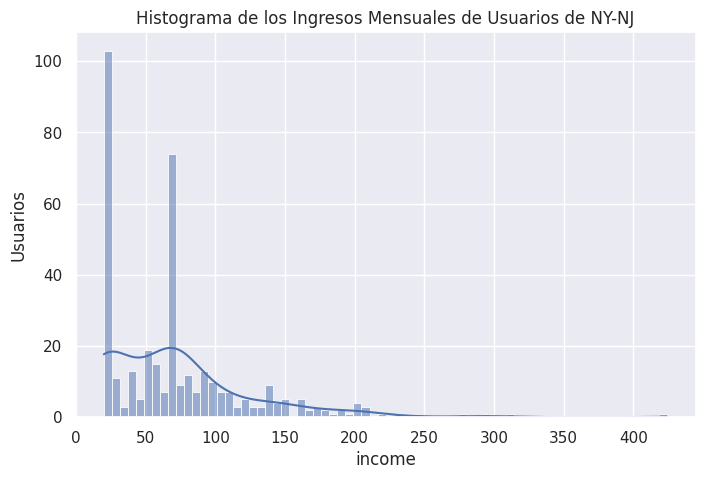

In [154]:
hisplot(df_ny_nj, 'income', 'Histograma de los Ingresos Mensuales de Usuarios de NY-NJ')

In [ ]:
hisplot(df_otra_ciudad, 'income', 'Histograma de los Ingresos Mensuales de Usuarios de Otra Ciudad')

In [ ]:
# Calculamos el promedio, la varianza y la desviación estándar de los usuarios de NY-NJ

prom_ny_nj = df_ny_nj['income'].mean()
print('Promedio de los usuarios de NY-NJ:', round(prom_ny_nj,2))

var_ny_nj = np.var(df_ny_nj['income'])
print('Varianza de los usuarios de NY-NJ:', round(var_ny_nj,2))

std_ny_nj = np.sqrt(var_ny_nj)
print('Desviación Estándar de los usuarios de NY-NJ:', round(std_ny_nj,2))


In [ ]:
# Calculamos el promedio, la varianza y la desviación estándar de los usuarios de otras ciudades

prom_otra_ciudad = df_otra_ciudad['income'].mean()
print('Promedio de Usuarios de Otra Ciudad:', round(prom_otra_ciudad,2))

var_otra_ciudad = np.var(df_otra_ciudad['income'])
print('Varianza de Usuarios de Otra Ciudad:', round(var_otra_ciudad,2))

std_otra_ciudad = np.sqrt(var_otra_ciudad)
print('Desviación Estándar de Usuarios de Otra Ciudad:', round(std_otra_ciudad,2))

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
H0: El ingreso promedio de los usuarios del área NY-NJ no difiere de la de los usuarios de otras regiones.

H1: El ingreso promedio de los usuarios del área NY-NJ difiere de los usuarios de otras regiones.

Valor alfa = 0.05

In [ ]:
city_levene = st.levene(df_ny_nj['income'], df_otra_ciudad['income'])

city_levene

In [ ]:
# Prueba las hipótesis
alpha = 0.05

results = st.ttest_ind(df_ny_nj['income'], df_otra_ciudad['income'], equal_var = True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la Hipótesis Nula')
else:
    print('No Rechazamos la Hipótesis Nula')


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Muy buena forma de realizar las pruebas de hipótesis. Además, lo complementas con la prueba de levene para mostrar el supuesto de varianzas iguales. 